![CampusX - Sequential Workflows in LangGraph Agentic AI using LangGraph Video 5 CampusX [bAWujyAl1Kk - 935x526 - 9m01s].png](<attachment:CampusX - Sequential Workflows in LangGraph Agentic AI using LangGraph Video 5 CampusX [bAWujyAl1Kk - 935x526 - 9m01s].png>)
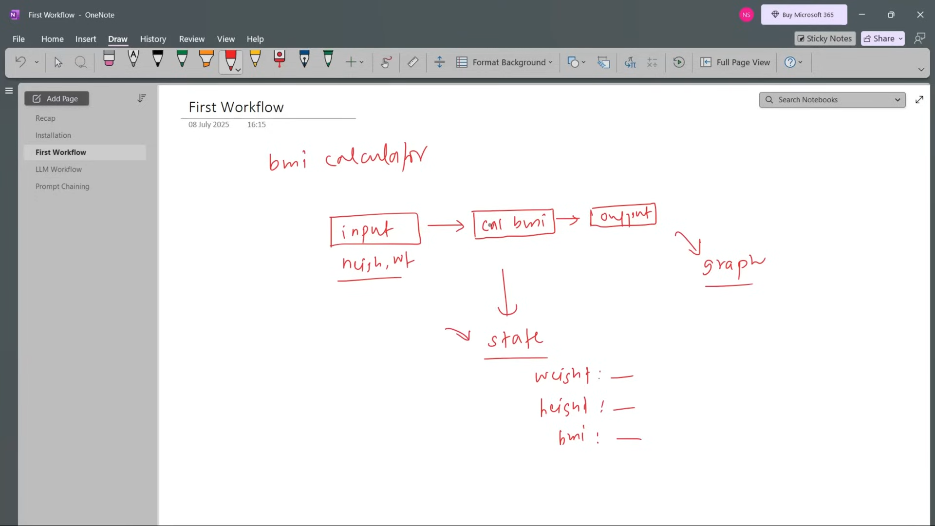

# <b>Workflow That we will Build

### <b><u>workflow1:

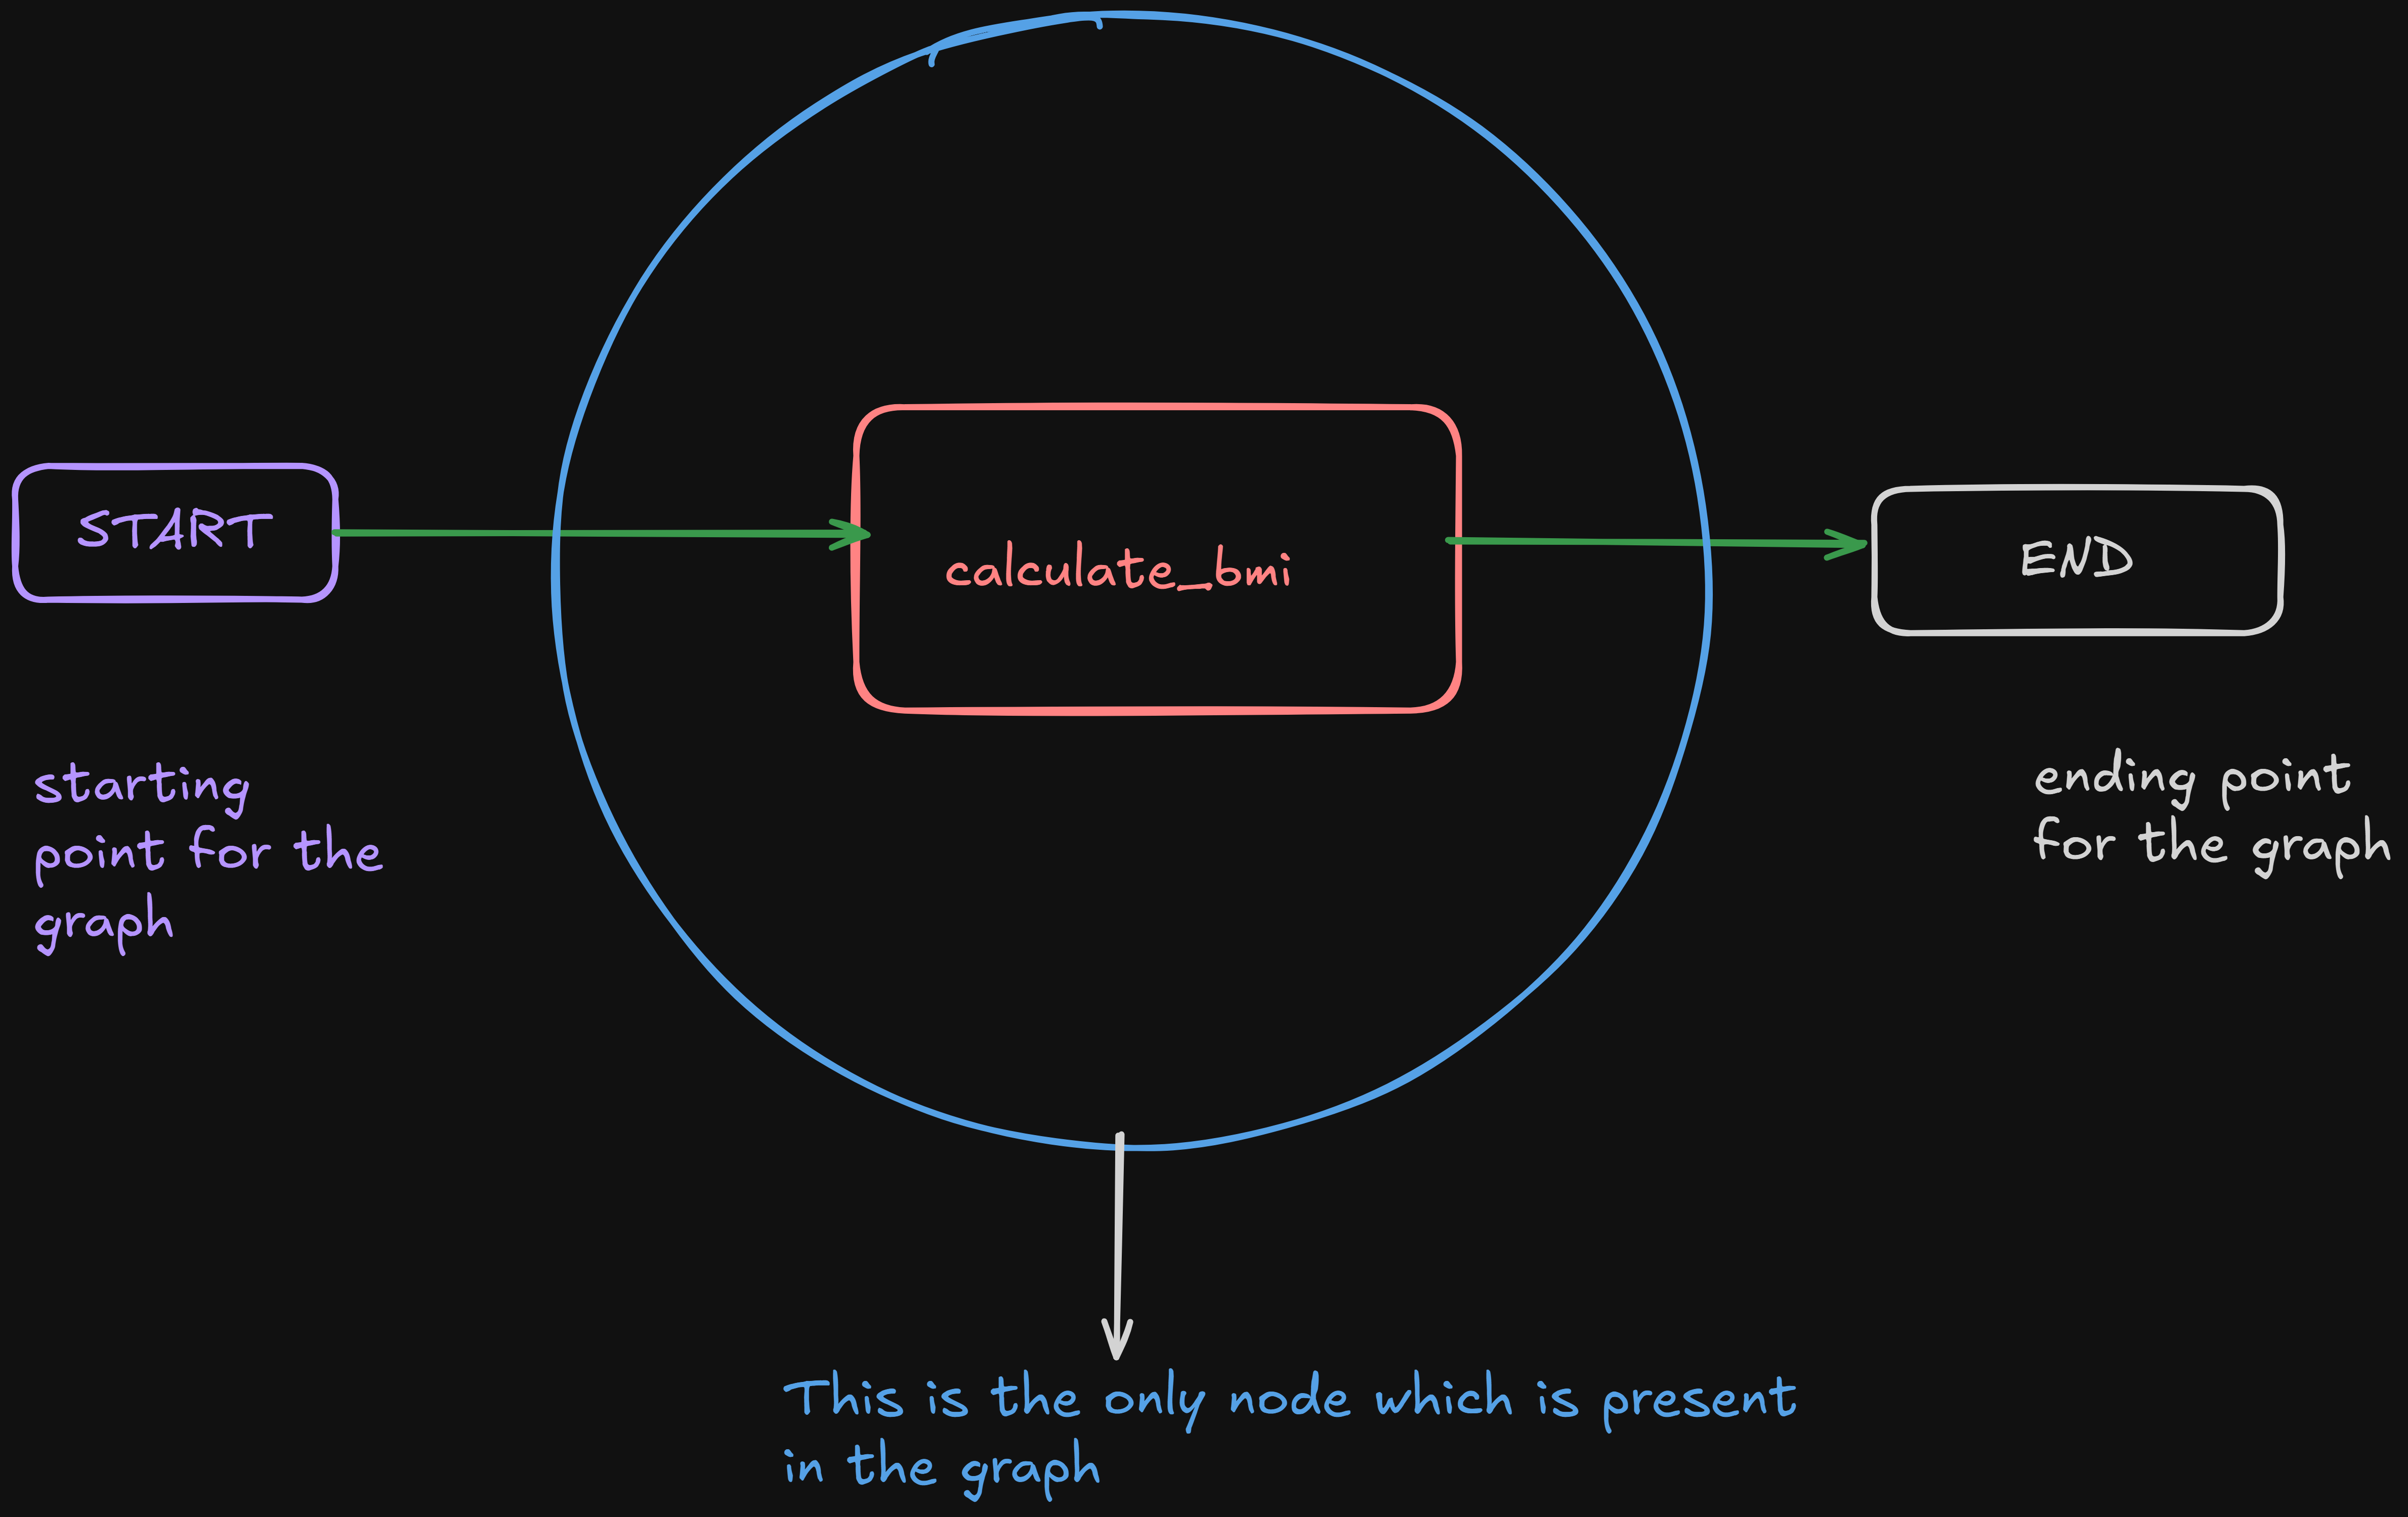

#### <b>Step by step to create the graph

##### importing libraries

In [8]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

##### Creating states

In [ ]:
# define state
class BMIState(TypedDict):
    weight_kg:float
    height_m:float
    bmi:float


##### Step1:-define your graph

In [6]:
graph = StateGraph(BMIState)

##### Step2:-add nodes to your graph

In [7]:
def  calculate_bmi(state: BMIState) -> BMIState:
    state['bmi'] = state['weight_kg'] / (state['height_m'] ** 2)
    return state

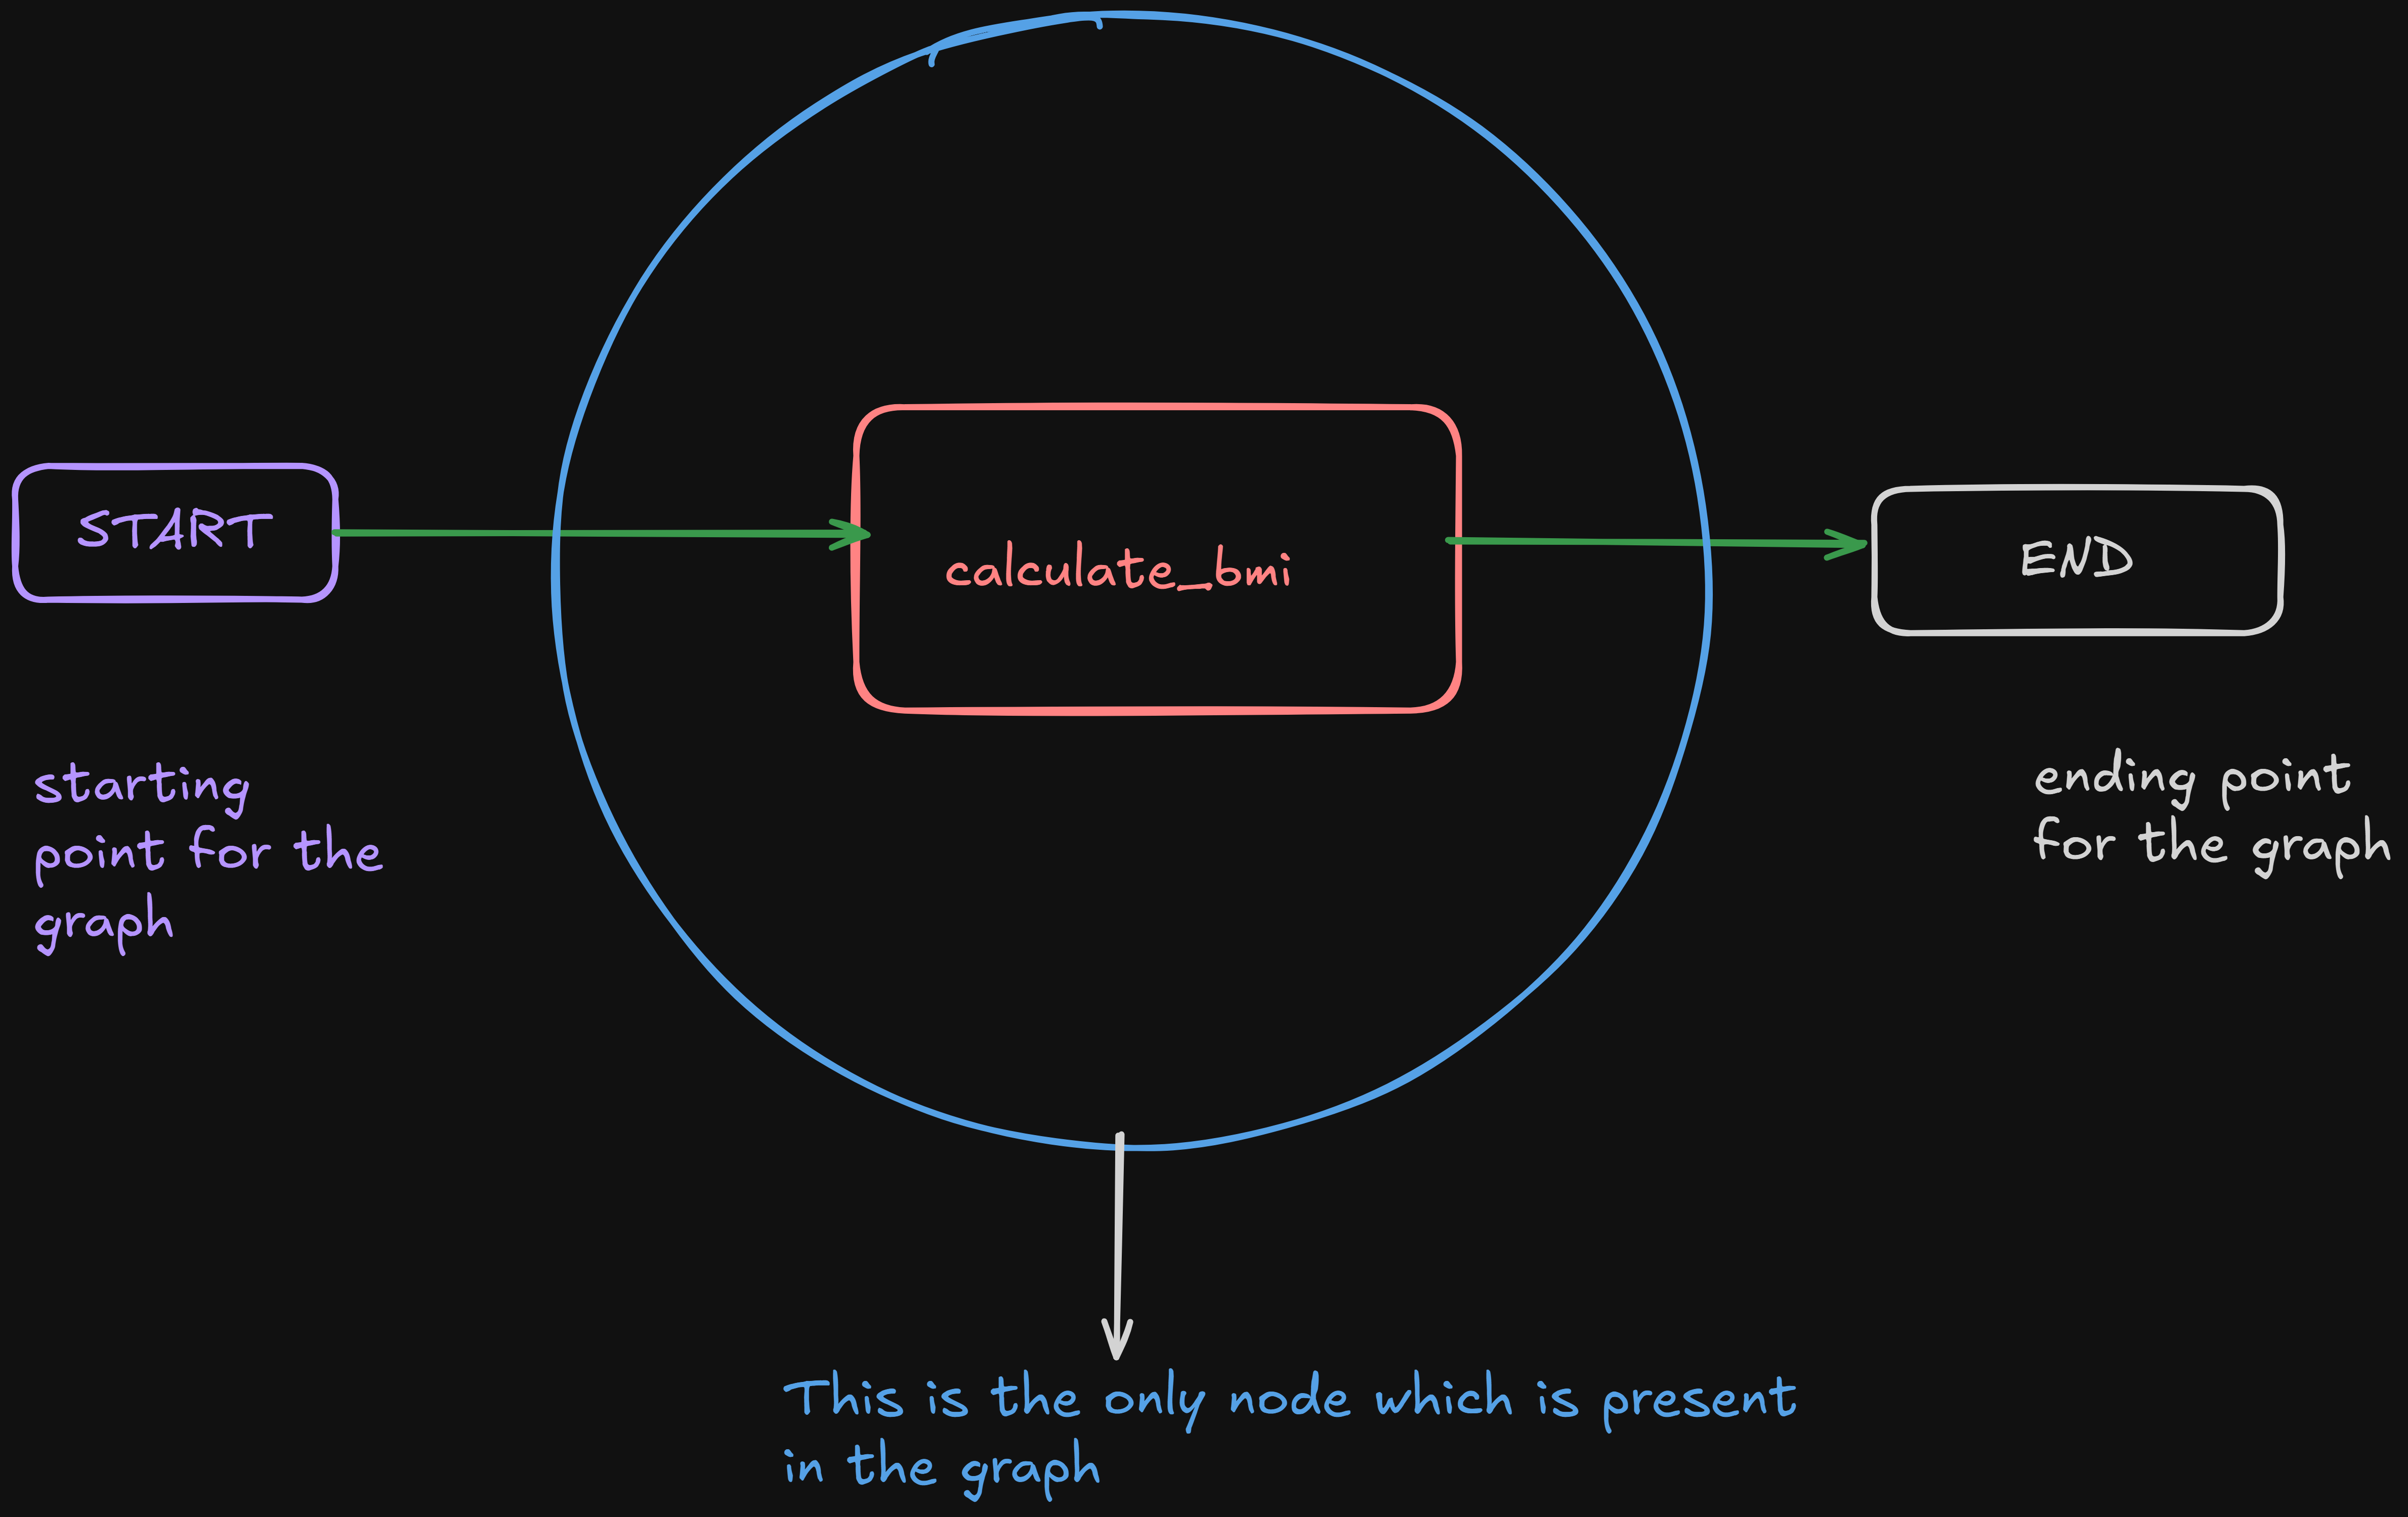

In [9]:
graph.add_node('calculate_bmi',calculate_bmi)

##### Step3:-add edges to graph

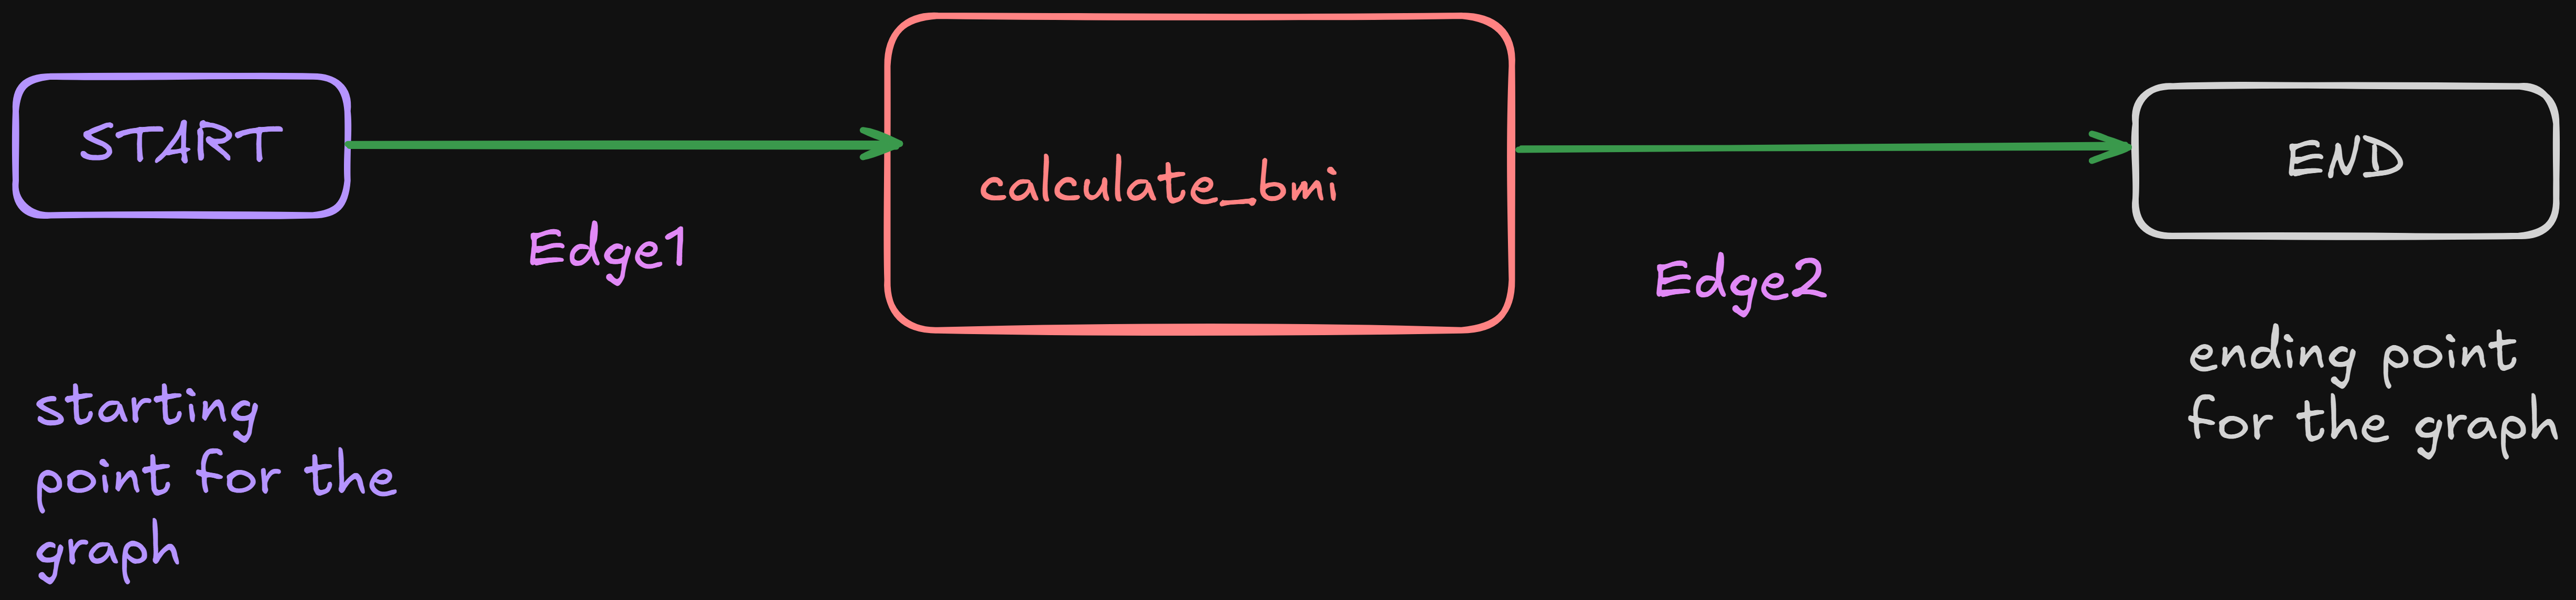

In [10]:
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi',END)

##### Step4:- compile the graph

In [11]:
workflow=graph.compile()

##### Step5:-execute the graph

In [13]:
initial_state={
        'weight_kg':80,
        'height_m':1.3
    }

In [14]:
output_state=workflow.invoke(initial_state)

##### Step6:-visualizing the Graph

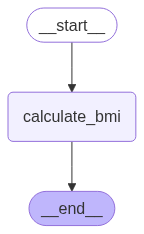

In [16]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())

In [ ]:
# getting mermaid drawing
print(workflow.get_graph().draw_mermaid())


---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	calculate_bmi(calculate_bmi)
	__end__([<p>__end__</p>]):::last
	__start__ --> calculate_bmi;
	calculate_bmi --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



<pre>







</pre>

# <b>workflow2:

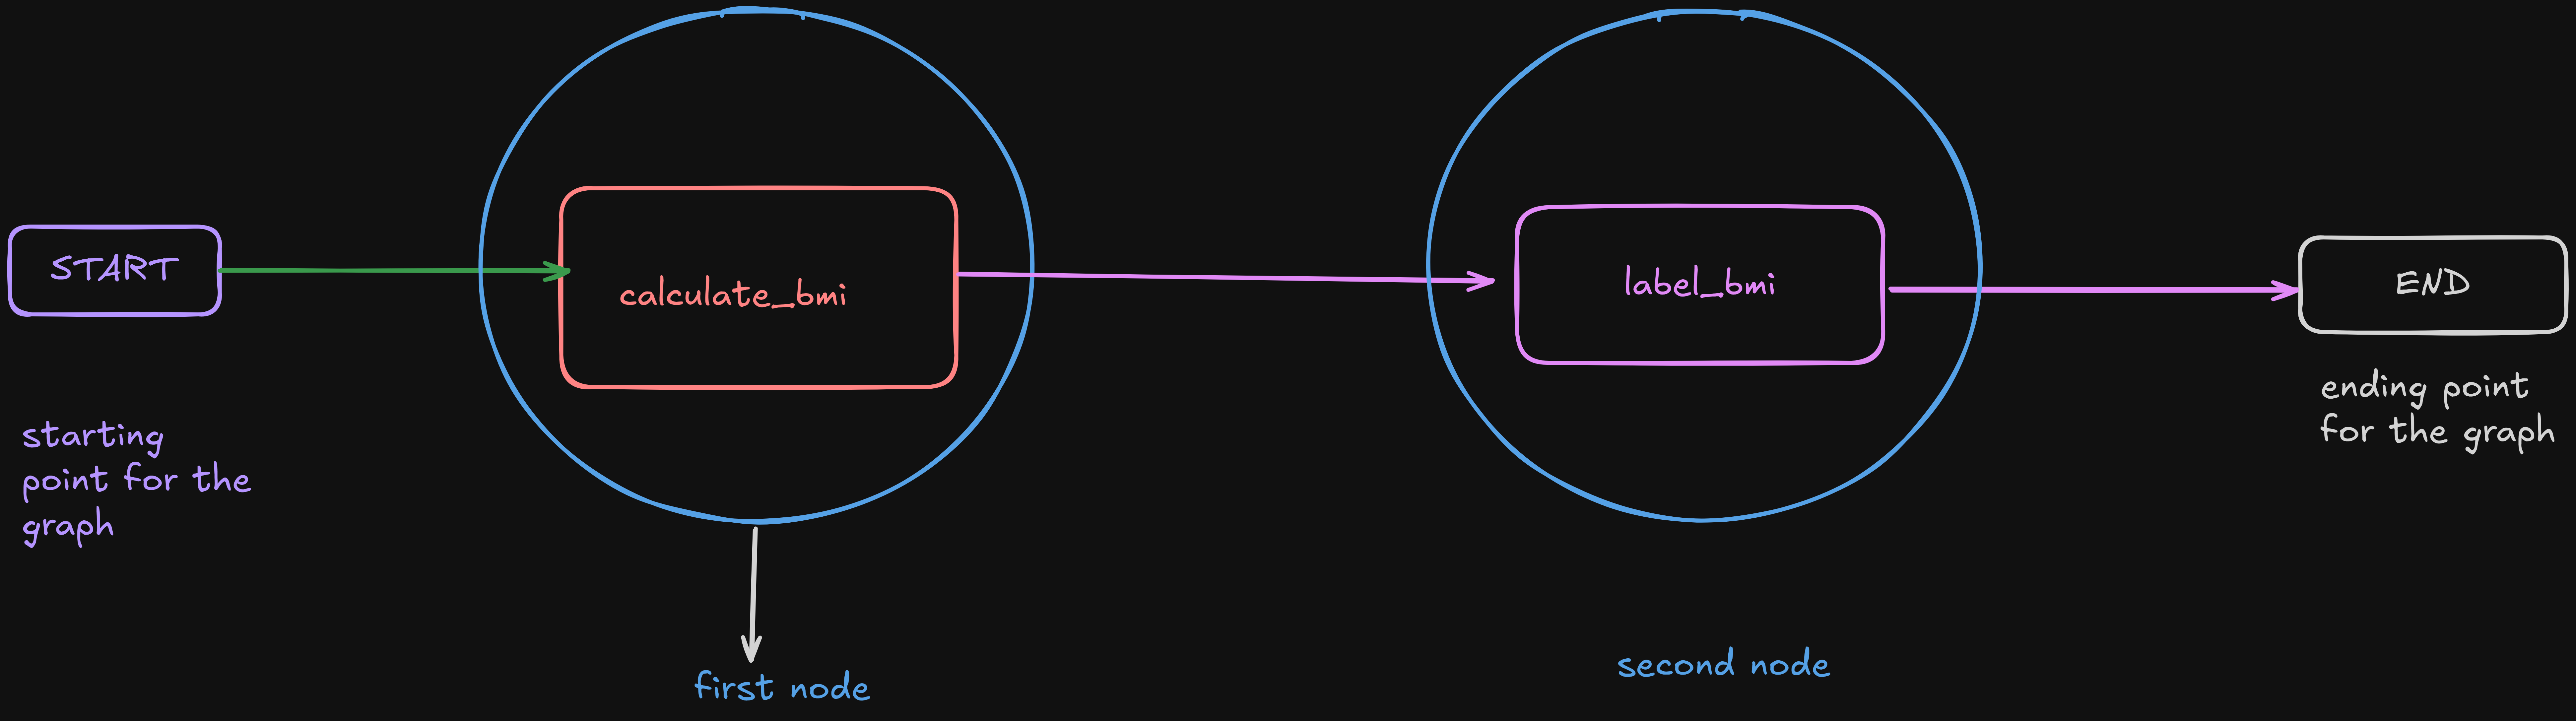

##### <b>Step by step

##### improting libraries

In [23]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

creating states

In [24]:
# define state
class BMIState(TypedDict):
    weight_kg:float
    height_m:float
    bmi:float
    category:str


step1:-initialing graph

In [25]:
graph = StateGraph(BMIState)

step2:-adding nodes to your graph

In [26]:

# functtion for bmi calculation
def  calculate_bmi(state: BMIState) -> BMIState:
    state['bmi'] = state['weight_kg'] / (state['height_m'] ** 2)
    return state

In [27]:
# function for bmi category
def label_bmi(state: BMIState) -> BMIState:
    if state['bmi'] < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= state['bmi'] < 24.9:
        state['category'] = 'Normal weight'
    elif 25 <= state['bmi'] < 29.9:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obesity'
    return state

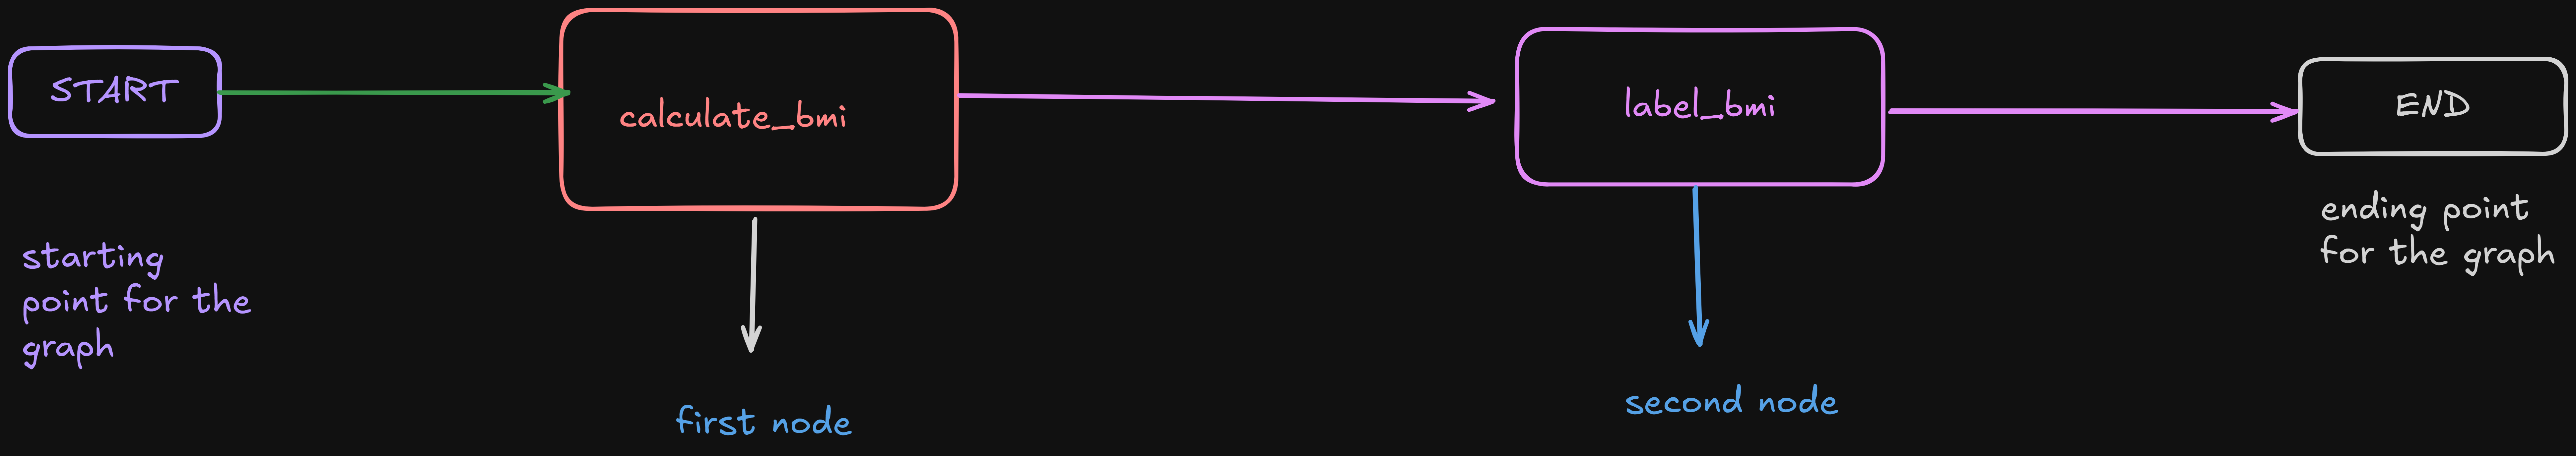

In [28]:
# first node
graph.add_node('calculate_bmi',calculate_bmi)


In [29]:
# second node
graph.add_node('label_bmi',label_bmi)

step3:-add edges to graph

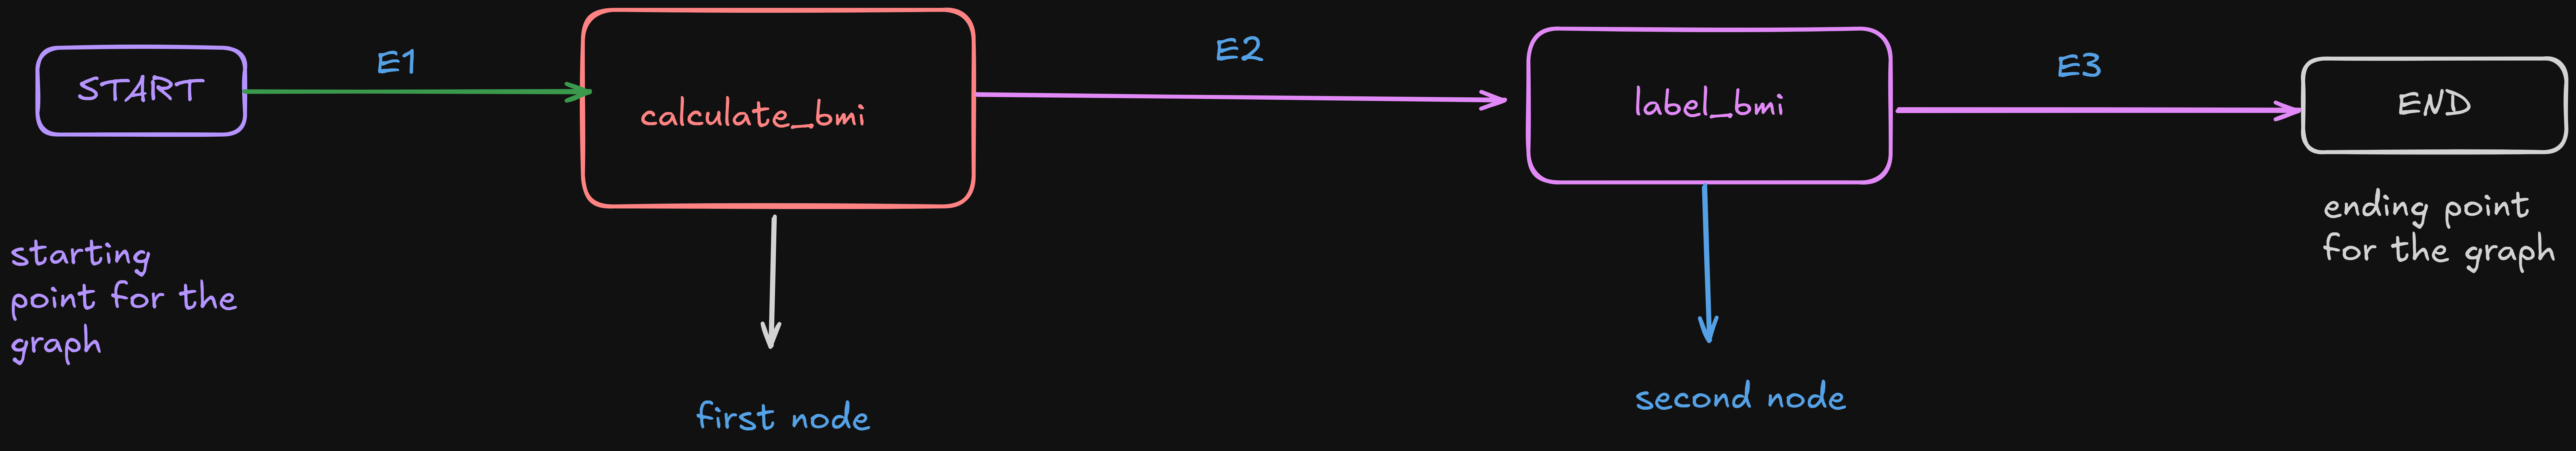

In [30]:
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi',"label_bmi")
graph.add_edge('label_bmi',END)

step4:-compile the graph

In [31]:
workflow=graph.compile()

step5:-executing the graph

In [32]:
initial_state={
        'weight_kg':80,
        'height_m':1.3
    }

In [34]:
output_state=workflow.invoke(initial_state)
output_state

{'weight_kg': 80,
 'height_m': 1.3,
 'bmi': 47.33727810650887,
 'category': 'Obesity'}

step6:-visualizing the graph

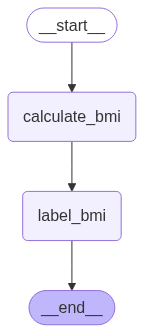

In [35]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())